# **Визуализация данных**

Лабораторная работа  посвящена работе с библиотеками matplotlib и seaborn, позволяющими организовать построение графиков для имеющихся данных.

Рекомендуется выполнять лабораторную работу в Google Colab с использованием браузера. Если на вашем компьютере установлена Anaconda, вы можете скачать задание и выполнять его с использованием Anaconda.



В самом начале работы следует подключить нужные нам библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Для выполнения последующих заданий в Google Colab потребуется подключить работу с гугл-диском, запустив следующую ячейку. (https://colab.research.google.com/drive/1DOwvT_j7OIkjZoNL4LwbXxDwmYUn0TLm?usp=sharing).

**Внимание! Если вы выполняете работу в Anaconda, следующую ячейку запускать не нужно!**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Перед выполнением следующих заданий вам нужно загрузить на свой гугл-диск файлы `pogoda.csv`, `tips.csv` и `Video_Games_Sales_as_at_22_Dec_2016.csv`. Файлы прикреплены к заданию.

**Если вы работаете в Anaconda, файлы нужно скачать на компьютер и поместить в папку, из которой вам будет удобно с ними работать.**

**Задание 1**  Загрузите набор данных `pogoda.csv` и для каждого параметра постройте график. Требования:
 - Цвет, стиль, толщина линии у графиков не должны повторяться.
 - Каждый график должен быть в своей системе координат, как показано на рисунке 1.
 - Добавьте названия, подписи осей и легенду.

**Примечание**: обратите внимание, что в таблице столбцы разделены символом табуляции. Для открытия необходимо использовать параметр `sep = '\t'`.


Рисунок 1 - Образец оформления графиков.  
  
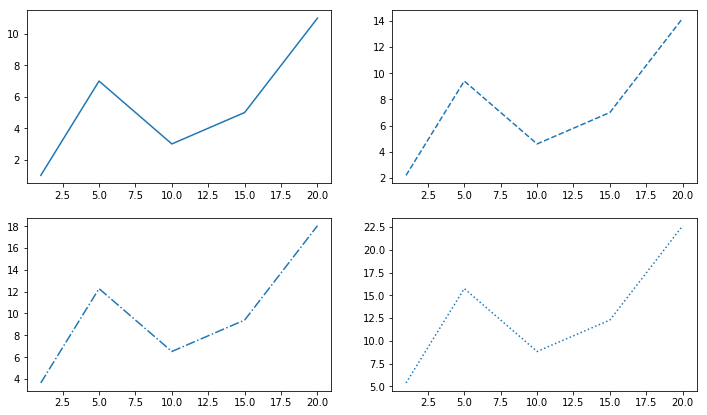

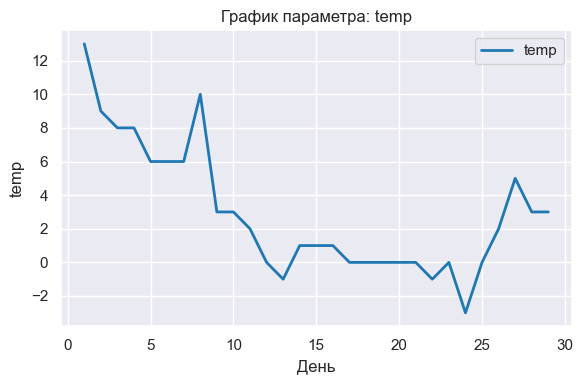

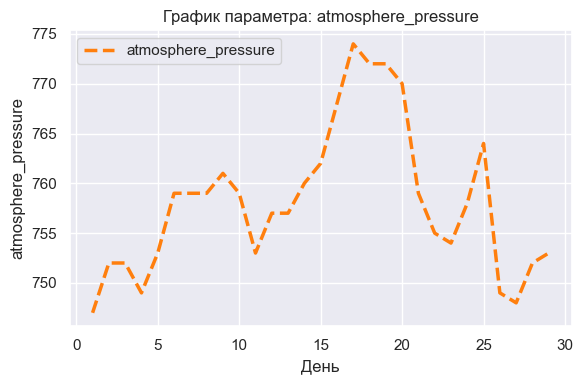

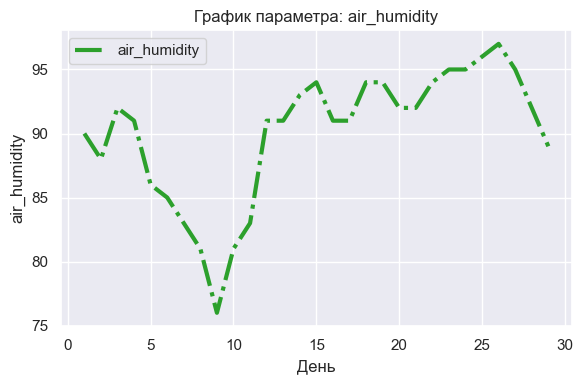

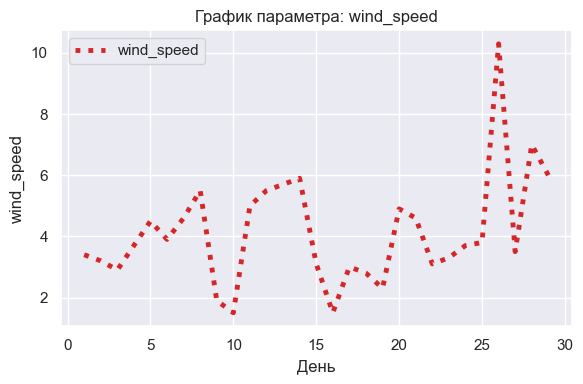

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

df = pd.read_csv("pogoda.csv", sep="\t")

x = df.iloc[:, 0]

params = df.columns[1:]

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
linestyles = ["-", "--", "-.", ":"]
linewidths = [2, 2.5, 3, 3.5]

for i, param in enumerate(params):
    plt.figure(figsize=(6, 4))

    plt.plot(
        x,
        df[param],
        color=colors[i],
        linestyle=linestyles[i],
        linewidth=linewidths[i],
        label=param
    )

    plt.title(f"График параметра: {param}")
    plt.xlabel("День")
    plt.ylabel(param)
    plt.legend()

    plt.tight_layout()
    plt.show()


**Задание 2**. - Загрузите набор данных `tips.csv`. Выполните следующие задания:
1. С помощью библиотеки matplotlib постройте столбчатую диаграмму, где на оси X будут названия дней, а на оси Y сумма чаевых. Вам потребуется сгруппировать данные.
2. Сделайте так, чтобы названия дней располагались по диагонали.
3. Сделайте так, чтобы у каждого дня был свой уникальный цвет.

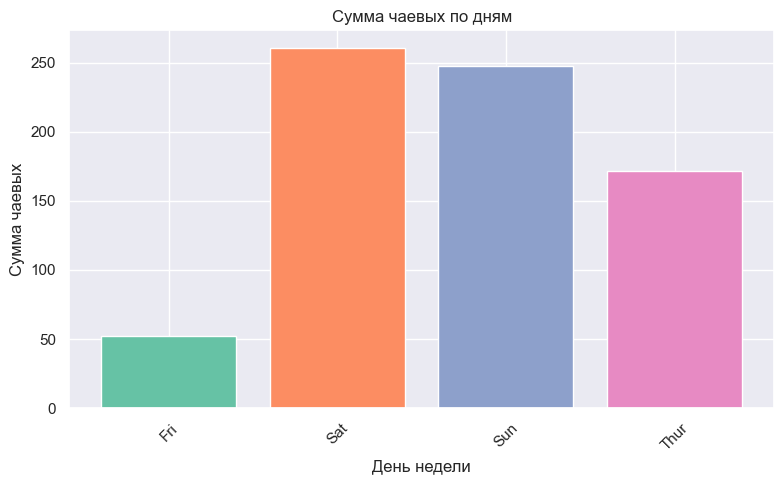

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

df = pd.read_csv("tips.csv")

tips_by_day = df.groupby("day")["tip"].sum()

days = tips_by_day.index
tips_sum = tips_by_day.values

colors = sns.color_palette("Set2", len(days))

plt.figure(figsize=(8, 5))

plt.bar(
    days,
    tips_sum,
    color=colors
)

plt.title("Сумма чаевых по дням")
plt.xlabel("День недели")
plt.ylabel("Сумма чаевых")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Задание 3**. Загрузите набор данных `Video_Games_Sales_as_at_22_Dec_2016.csv`
1. Удалите из него все записи с пропусками и выведите размеры датафрейма (должно получиться 6825 записи)
2. Удалите лишние параметры. У вас должны остаться: 'Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'
3. Скорректируйте формат данных. Параметр 'User_Score' должен иметь формат 'float64', 'Year_of_Release' — 'int64', 'User_Count' — 'int64', 'Critic_Count' — 'int64'
4. Выведите полученную таблицу
5. По полученной таблице постройте график продаж видео игр в различных странах в зависимости от года (см. рис. 2).

Рисунок 2 - Примерный результат

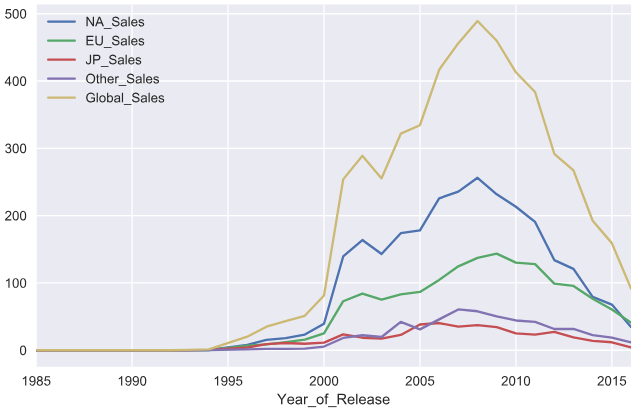

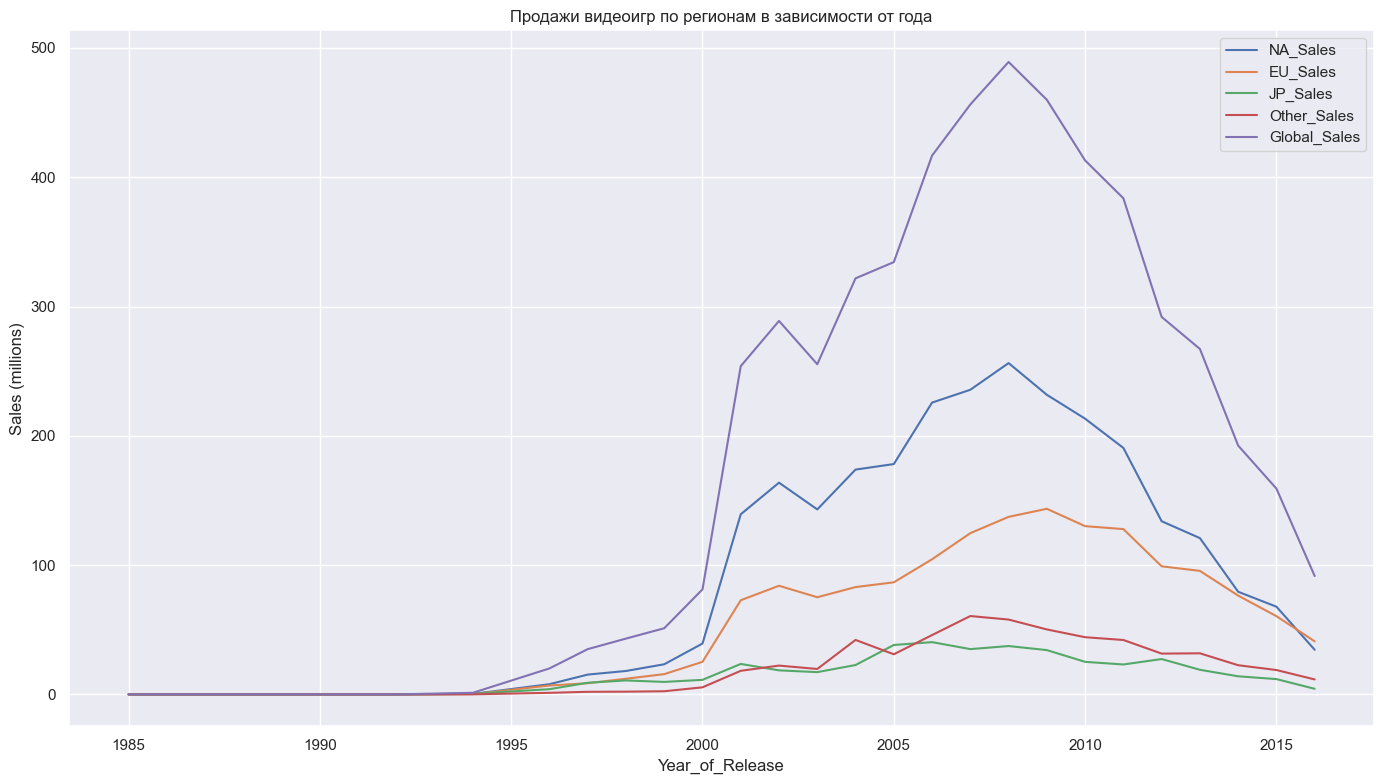

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 7)

df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

df = df.dropna()

columns_needed = [
    'Name', 'Platform', 'Year_of_Release', 'Genre',
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
    'Global_Sales',
    'Critic_Score', 'Critic_Count',
    'User_Score', 'User_Count',
    'Rating'
]

df = df[columns_needed]

df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

sales_by_year = (
    df.groupby('Year_of_Release')[[
        'NA_Sales', 'EU_Sales', 'JP_Sales',
        'Other_Sales', 'Global_Sales'
    ]]
    .sum()
    .reset_index()
)


plt.figure(figsize=(14, 8))

plt.plot(sales_by_year['Year_of_Release'], sales_by_year['NA_Sales'], label='NA_Sales')
plt.plot(sales_by_year['Year_of_Release'], sales_by_year['EU_Sales'], label='EU_Sales')
plt.plot(sales_by_year['Year_of_Release'], sales_by_year['JP_Sales'], label='JP_Sales')
plt.plot(sales_by_year['Year_of_Release'], sales_by_year['Other_Sales'], label='Other_Sales')
plt.plot(sales_by_year['Year_of_Release'], sales_by_year['Global_Sales'], label='Global_Sales')

plt.xlabel('Year_of_Release')
plt.ylabel('Sales (millions)')
plt.title('Продажи видеоигр по регионам в зависимости от года')
plt.legend()
plt.tight_layout()

plt.show()

**Задание 4**. С помощью библиотеки `seaborn` постройте распределение оценок критиков `Critic_Score` (рисунок 3) для датасета, загруженного в задании 3.

Рисунок 3 - Примерный результат  

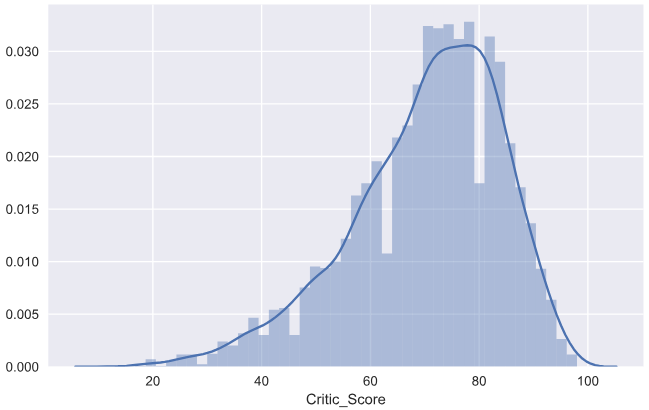

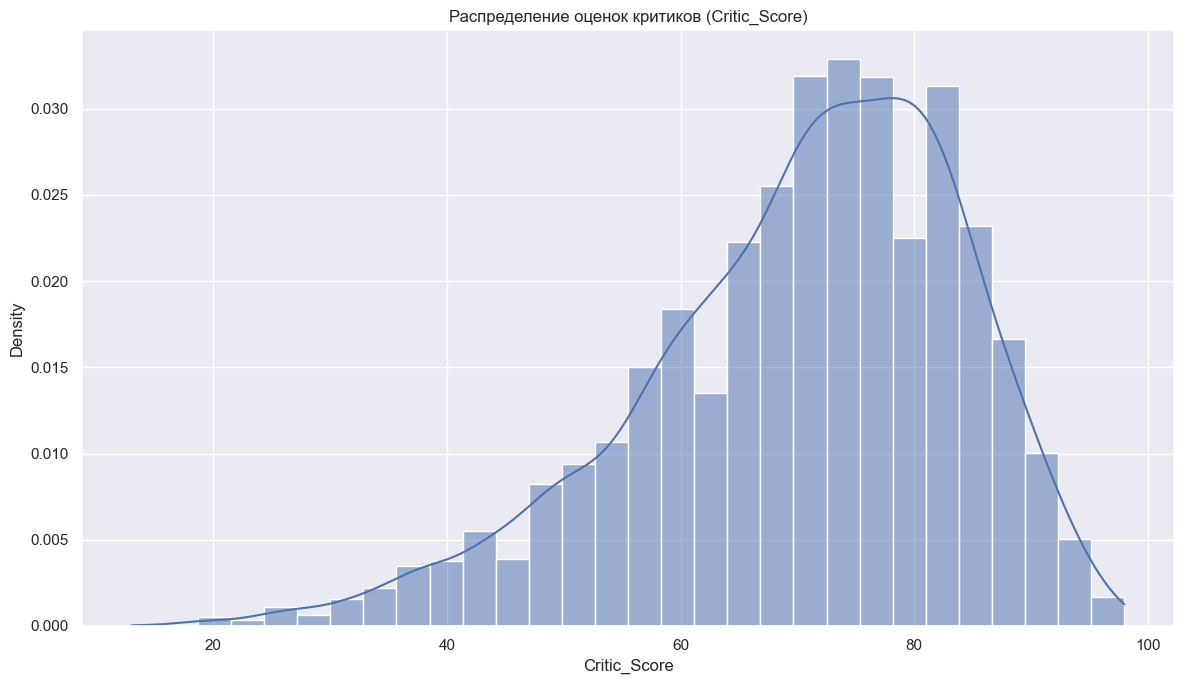

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 7)

df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

df = df.dropna()

df = df[
    [
        'Name', 'Platform', 'Year_of_Release', 'Genre',
        'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
        'Global_Sales',
        'Critic_Score', 'Critic_Count',
        'User_Score', 'User_Count',
        'Rating'
    ]
]

df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

plt.figure(figsize=(12, 7))

sns.histplot(
    df['Critic_Score'],
    bins=30,
    kde=True,
    stat="density"
)

plt.xlabel("Critic_Score")
plt.ylabel("Density")
plt.title("Распределение оценок критиков (Critic_Score)")

plt.tight_layout()
plt.show()


**Задание 5**. Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, можно использовать __`joint_plot`__ — это гибрид `scatter plot` и `histogram` (отображаются также гистограммы распределений признаков). Продемонстрируйте, как связаны между собой оценка критиков `Critic_Score` и оценка пользователя `User_Score` для датасета из задания 3.

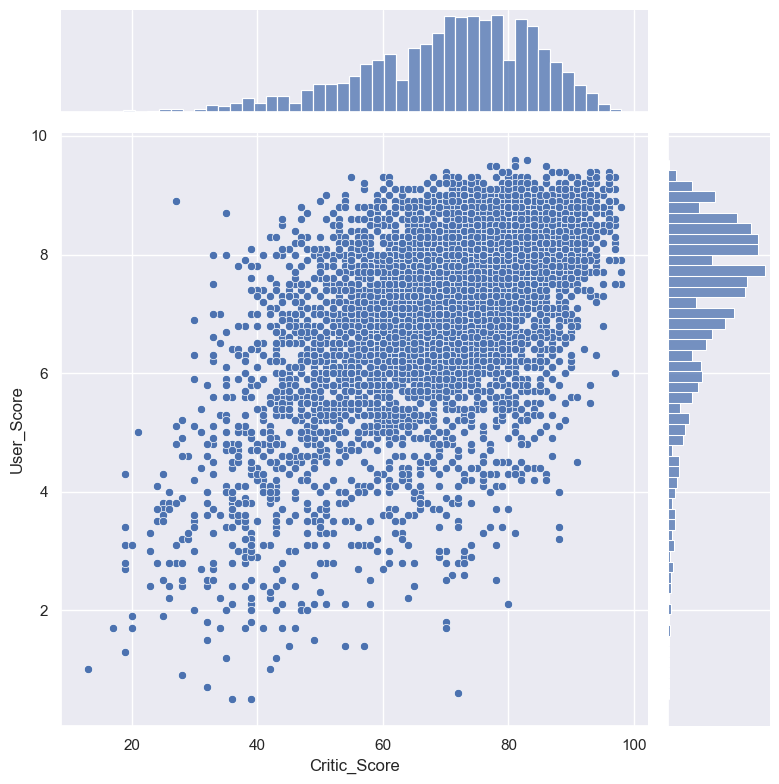

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

df = df.dropna()

df = df[
    [
        'Name', 'Platform', 'Year_of_Release', 'Genre',
        'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
        'Global_Sales',
        'Critic_Score', 'Critic_Count',
        'User_Score', 'User_Count',
        'Rating'
    ]
]

df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

sns.jointplot(
    data=df,
    x="Critic_Score",
    y="User_Score",
    kind="scatter",
    height=8
)

plt.show()


**Задание 6.** Для датасета из задания 3 постройте pair plot для следующих признаков: 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'

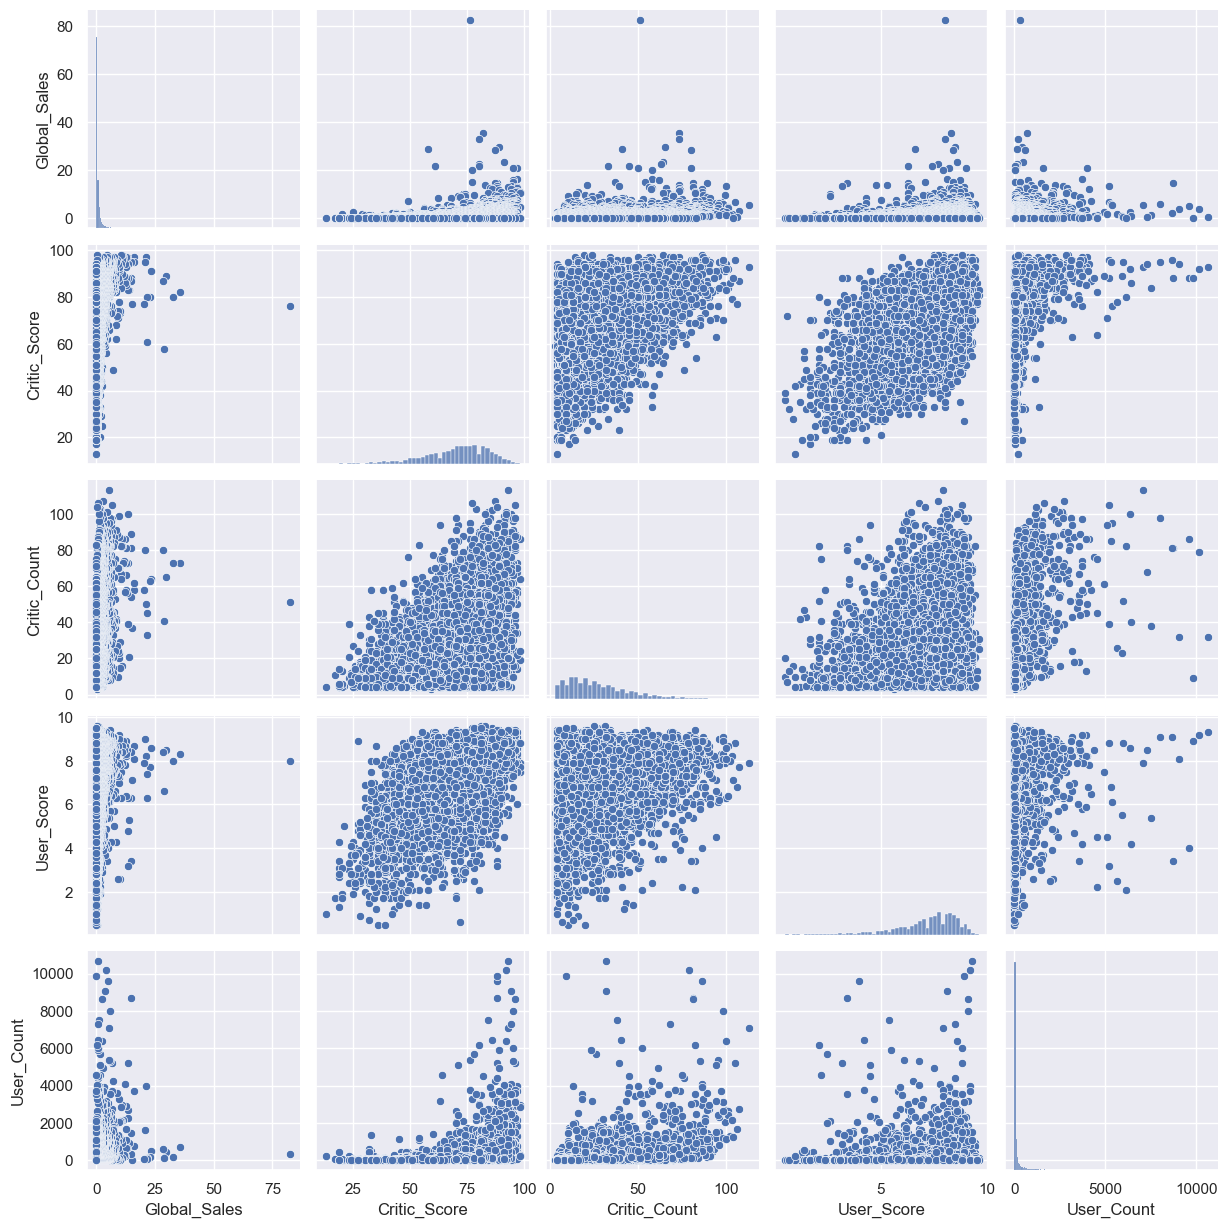

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

df = df.dropna()

df = df[
    [
        'Name', 'Platform', 'Year_of_Release', 'Genre',
        'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
        'Global_Sales',
        'Critic_Score', 'Critic_Count',
        'User_Score', 'User_Count',
        'Rating'
    ]
]

df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

features = [
    'Global_Sales',
    'Critic_Score',
    'Critic_Count',
    'User_Score',
    'User_Count'
]

sns.pairplot(
    df[features],
    diag_kind="hist"
)

plt.show()
